In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn  as sns

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
df = pd.read_excel('/home/yuxiang/高级工程数学/Lasso-and-Ridge-Regression/Real estate valuation data set.xlsx')

In [5]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


<AxesSubplot:>

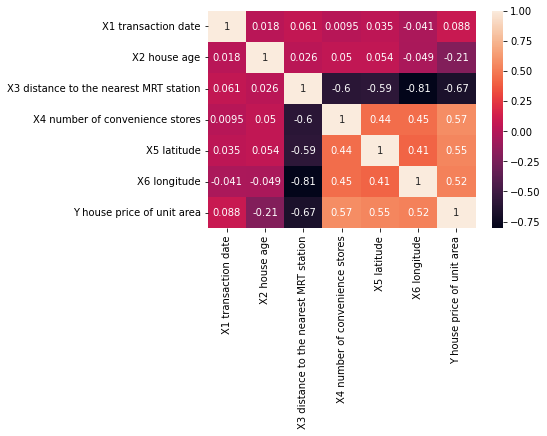

In [6]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
# df = df.drop(columns = 'No')

In [9]:
Y = df['Y house price of unit area']

In [10]:
X = df.drop(columns = ['Y house price of unit area', 'X1 transaction date', 'X2 house age'])

In [11]:
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [12]:
x_train.dtypes

X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
dtype: object

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg_y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, lin_reg_y_pred)
print(mse)

63.904931047089384


In [14]:
coeff_lin = pd.DataFrame()
coeff_lin["Columns"] = x_train.columns
coeff_lin["Coefficients"]  = pd.Series(lin_reg.coef_)
print(coeff_lin)

                                  Columns  Coefficients
0  X3 distance to the nearest MRT station     -0.004709
1         X4 number of convenience stores      1.007691
2                             X5 latitude    221.632669
3                            X6 longitude     -8.841321


In [15]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred_lasso)
print(mse)

67.04829587817318


In [16]:
coeff_lasso = pd.DataFrame()
coeff_lasso["Columns"] = x_train.columns
coeff_lasso["Coefficients"]  = pd.Series(lasso.coef_)
print(coeff_lasso)

                                  Columns  Coefficients
0  X3 distance to the nearest MRT station     -0.005994
1         X4 number of convenience stores      0.958896
2                             X5 latitude      0.000000
3                            X6 longitude     -0.000000


In [17]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print(mse)

66.07258621837417


In [18]:
coeff_ridge = pd.DataFrame()
coeff_ridge["Columns"] = x_train.columns
coeff_ridge["Coefficients"]  = pd.Series(ridge.coef_)
print(coeff_ridge)

                                  Columns  Coefficients
0  X3 distance to the nearest MRT station     -0.005700
1         X4 number of convenience stores      1.135925
2                             X5 latitude      7.304642
3                            X6 longitude     -0.915969


/home/yuxiang/miniconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


<Figure size 2160x432 with 0 Axes>

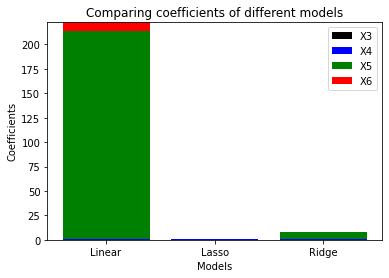

In [19]:
plt.figure(figsize=(30,6))
x = ['Linear', 'Lasso', 'Ridge']
y1 = np.array([-0.004709, -0.005994, 0.005700])
y2 = np.array([1.007691, 0.958896,  1.135925])
y3 = np.array([221.632669, 0.000000, 7.304642])
y4 = np.array([-8.841321, -0.000000, -0.915969])
fig, axes = plt.subplots(ncols=1, nrows=1)
plt.bar(x, y1, color = 'black')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='g')
plt.bar(x, y4, bottom=y1+y2+y3, color='r')
plt.xlabel("Models")
plt.ylabel("Coefficients")
plt.legend(["X3", "X4", "X5", "X6"])
plt.title("Comparing coefficients of different models")
axes.set_xticklabels(['Linear', 'Lasso', 'Ridge'])
plt.show()

In [20]:
!pip install yellowbrick

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [21]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

/home/yuxiang/miniconda3/envs/pt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


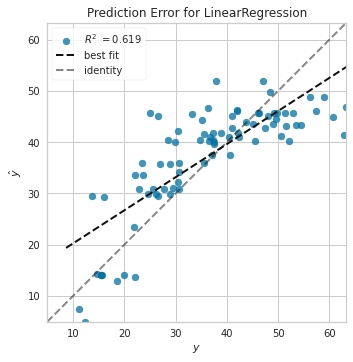

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [22]:
visualizer = PredictionError(lin_reg)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

/home/yuxiang/miniconda3/envs/pt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


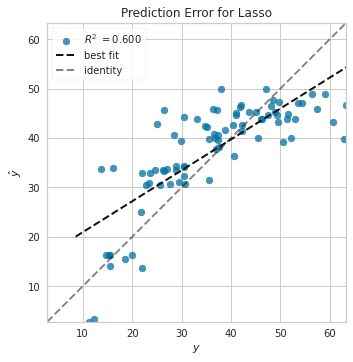

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [23]:
visualizer = PredictionError(lasso)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

/home/yuxiang/miniconda3/envs/pt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


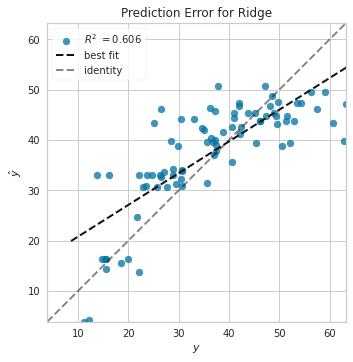

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [24]:
visualizer = PredictionError(ridge)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

/home/yuxiang/miniconda3/envs/pt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/home/yuxiang/miniconda3/envs/pt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
/home/yuxiang/miniconda3/envs/pt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


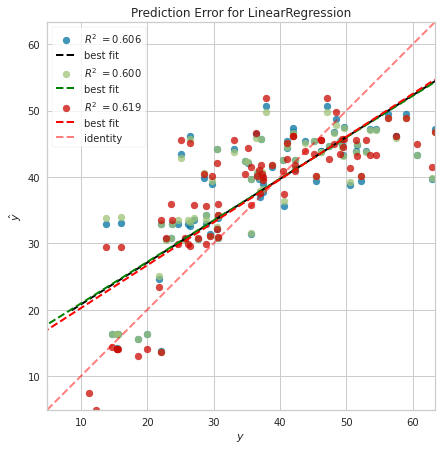

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
from yellowbrick.features import RadViz
visualizer = RadViz(size=(500, 900))
visualizer_1 = PredictionError(ridge, line_color = 'black')
visualizer_1.fit(x_train, y_train)  
visualizer_1.score(x_test, y_test)  
# visualizer_1.poof()
visualizer_2 = PredictionError(lasso, line_color = 'green')
visualizer_2.fit(x_train, y_train)  
visualizer_2.score(x_test, y_test)  
# visualizer_2.poof()
visualizer_3 = PredictionError(lin_reg, line_color = 'red')
visualizer_3.fit(x_train, y_train)  
visualizer_3.score(x_test, y_test)  
visualizer_3.poof()

In [45]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(x_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(x_train, y_train)
test_score_lr = lr.score(x_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(x_train, y_train)
test_score_ridge = ridgeReg.score(x_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


The train score for lr model is 0.4966315293022744
The test score for lr model is 0.6190687388691413

Ridge Model............................................

The train score for ridge model is 0.4697838344656119
The test score for ridge model is 0.6049491125065585


ValueError: x and y must have same first dimension, but have shapes (7,) and (4,)

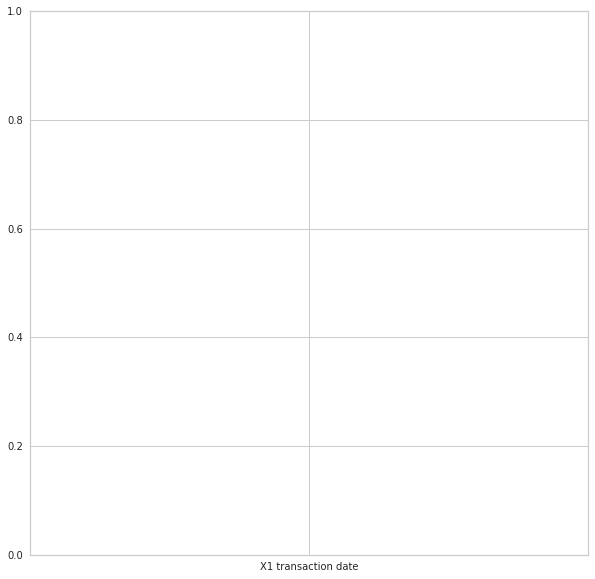

In [47]:
plt.figure(figsize = (10, 10))
plt.plot(df.columns[0:7],ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(df.columns[0:7],lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()